### Importing Libraries

In [1]:
import librosa
import soundfile
import pandas as pd
import os, glob, pickle
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from keras.models import model_from_json
from keras.models import load_model
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

Using TensorFlow backend.


### Function for extracting features

In [2]:

def extract_mfcc(wav_file_name):
    y, sr = librosa.load(wav_file_name)
    mfccs = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T,axis=0)
    
    return mfccs

### Loading dataset

In [3]:
radvess_speech_labels = []
ravdess_speech_data = [] 
for dirname, _, filenames in os.walk('F:\\107620_256618_bundle_archive\\'):
    for filename in filenames:
        
        radvess_speech_labels.append(int(filename[7:8]) - 1)
        
        wav_file_name = os.path.join(dirname, filename)
        ravdess_speech_data.append(extract_mfcc(wav_file_name))

In [4]:
emotion_df = pd.DataFrame(radvess_speech_labels, columns=['Emotions'])
feature_df = pd.DataFrame(ravdess_speech_data)
Ravdess_df = pd.concat([feature_df,emotion_df], axis=1)
        
print("Finish Loading the Dataset")
Ravdess_df

Finish Loading the Dataset


,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,Emotions
0,-697.984192,55.228489,0.323863,12.775377,7.396148,0.866224,-3.550276,-2.828331,-11.305533,-2.524927,...,-1.967064,-2.855390,-1.703427,-3.328374,-1.431488,-1.195484,-1.674807,-3.587147,-1.461006,0
1,-693.069702,55.734570,-1.919739,16.408997,8.449355,0.220736,-1.738342,-4.931291,-11.981820,-0.993780,...,-2.508108,-2.301962,-2.312677,-3.157205,-0.676972,-1.408076,-2.979329,-3.307365,-2.219295,0
2,-691.770142,58.350647,-0.165160,13.952126,5.053323,1.489326,-2.397429,-5.059065,-10.638003,-3.344197,...,-2.001603,-2.526743,-1.787501,-2.874714,-1.880346,-1.193676,-2.646903,-3.576790,-2.178030,0
3,-685.237915,56.236691,2.453112,13.566656,6.701949,3.341493,-1.895052,-6.673817,-10.671633,-2.946320,...,-2.010907,-3.006704,-2.649250,-3.361632,-1.357965,-1.057094,-2.373857,-3.516003,-3.311255,0
4,-727.317932,62.764400,2.751275,15.473256,7.763115,2.330714,-3.641682,-3.367344,-10.113078,-4.470085,...,-1.022449,-2.078944,-2.266737,-1.915980,-0.282572,-1.916051,-1.606609,-3.960974,-2.618362,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2875,-586.762634,25.372396,-17.824156,-1.315452,-15.738236,-9.392014,-16.071714,-15.114341,-6.811911,-6.893698,...,1.045612,1.018843,1.047722,-1.751398,-1.265239,-1.941771,-0.216499,-1.095275,0.459222,7
2876,-532.757446,38.194206,-15.409904,-5.477151,-15.620424,-13.425549,-11.158518,-11.567695,-8.727760,-3.168304,...,-0.043256,-0.907802,0.324583,-0.899907,1.323310,-2.088092,-0.978145,-1.354968,-0.142505,7
2877,-541.550232,30.086676,-18.491722,-2.648303,-14.771161,-17.068848,-12.715224,-11.865125,-7.334210,-0.318764,...,1.261050,-1.290491,0.098937,-1.128738,1.056421,-1.321505,-0.229303,-1.118261,0.129871,7
2878,-492.985962,24.425610,-6.565718,2.215220,-11.599139,-4.619690,-10.614051,-8.606992,-1.773706,-4.018751,...,1.149274,-2.025188,0.022709,-1.240849,1.109606,0.100893,1.088784,-1.589957,1.574795,7


In [5]:
Ravdess_df.Emotions.replace({0:'neutral', 1:'calm', 2:'happy', 3:'sad', 4:'angry', 5:'fear', 6:'disgust', 7:'surprise'}, inplace=True)
Ravdess_df.head()

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,Emotions
0,-697.984192,55.228489,0.323863,12.775377,7.396148,0.866224,-3.550276,-2.828331,-11.305533,-2.524927,...,-1.967064,-2.855390,-1.703427,-3.328374,-1.431488,-1.195484,-1.674807,-3.587147,-1.461006,neutral
1,-693.069702,55.734570,-1.919739,16.408997,8.449355,0.220736,-1.738342,-4.931291,-11.981820,-0.993780,...,-2.508108,-2.301962,-2.312677,-3.157205,-0.676972,-1.408076,-2.979329,-3.307365,-2.219295,neutral
2,-691.770142,58.350647,-0.165160,13.952126,5.053323,1.489326,-2.397429,-5.059065,-10.638003,-3.344197,...,-2.001603,-2.526743,-1.787501,-2.874714,-1.880346,-1.193676,-2.646903,-3.576790,-2.178030,neutral
3,-685.237915,56.236691,2.453112,13.566656,6.701949,3.341493,-1.895052,-6.673817,-10.671633,-2.946320,...,-2.010907,-3.006704,-2.649250,-3.361632,-1.357965,-1.057094,-2.373857,-3.516003,-3.311255,neutral
4,-727.317932,62.764400,2.751275,15.473256,7.763115,2.330714,-3.641682,-3.367344,-10.113078,-4.470085,...,-1.022449,-2.078944,-2.266737,-1.915980,-0.282572,-1.916051,-1.606609,-3.960974,-2.618362,calm


In [6]:
X = Ravdess_df.iloc[: ,:-1].values
Y = Ravdess_df['Emotions'].values
print(X)

[[-6.97984192e+02  5.52284889e+01  3.23863089e-01 ... -1.67480683e+00
  -3.58714676e+00 -1.46100640e+00]
 [-6.93069702e+02  5.57345695e+01 -1.91973925e+00 ... -2.97932935e+00
  -3.30736542e+00 -2.21929502e+00]
 [-6.91770142e+02  5.83506470e+01 -1.65160105e-01 ... -2.64690304e+00
  -3.57678962e+00 -2.17803001e+00]
 ...
 [-5.41550232e+02  3.00866756e+01 -1.84917221e+01 ... -2.29303464e-01
  -1.11826110e+00  1.29870504e-01]
 [-4.92985962e+02  2.44256096e+01 -6.56571770e+00 ...  1.08878422e+00
  -1.58995676e+00  1.57479489e+00]
 [-5.18293823e+02  3.00432606e+01 -4.41440105e+00 ...  3.80374044e-02
  -1.99243033e+00  8.42117608e-01]]


### Converting categorical data

In [7]:

encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

### Splitting data for training and testing

In [8]:
x_train,x_test,y_train,y_test=train_test_split(np.array(X), Y, test_size=0.2, random_state=30)

In [9]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((2304, 40), (2304, 8), (576, 40), (576, 8))

In [10]:

print((x_train.shape[0], x_test.shape[0]))

(2304, 576)


In [11]:

print(f'Features extracted: {x_train.shape[1]}')

Features extracted: 40


### Building MLP Classifier

In [12]:

model=MLPClassifier(alpha=0.01, batch_size=256, epsilon=1e-08, hidden_layer_sizes=(300,), learning_rate='adaptive', max_iter=500)


### Training Data

In [13]:

model.fit(x_train,y_train)

C:\Users\chait\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.01, batch_size=256, beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(300,), learning_rate='adaptive',
              learning_rate_init=0.001, max_iter=500, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [14]:

y_pred2=model.predict(x_train)

In [15]:

y_pred=model.predict(x_test)

### Finding Accuracy

In [16]:

accuracy=accuracy_score(y_true=y_train, y_pred=y_pred2)

print("Accuracy of training set: {:.2f}%".format(accuracy*100))

Accuracy of training set: 100.00%


In [17]:

accuracy=accuracy_score(y_true=y_test, y_pred=y_pred)

print("Accuracy of testing set: {:.2f}%".format(accuracy*100))

Accuracy of testing set: 93.75%


### Building Confusion Matrix and Classification Report

In [18]:
pred_test = model.predict(x_test)
y_pred = encoder.inverse_transform(pred_test)

y_test = encoder.inverse_transform(y_test)

In [19]:
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test.flatten()

In [20]:
df.head(10)

,Predicted Labels,Actual Labels
0,sad,sad
1,happy,happy
2,fear,fear
3,angry,angry
4,angry,surprise
5,calm,calm
6,sad,sad
7,sad,sad
8,calm,calm
9,sad,sad


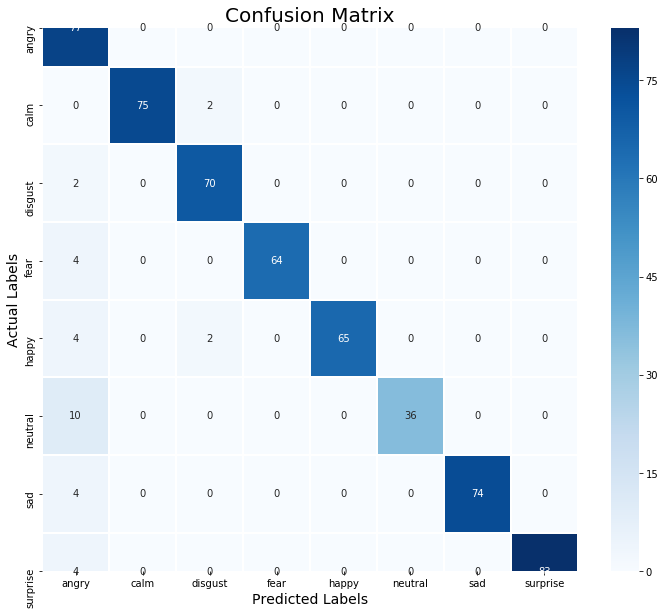

In [21]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [22]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

       angry       0.73      1.00      0.85        77
        calm       1.00      0.97      0.99        77
     disgust       0.95      0.97      0.96        72
        fear       1.00      0.94      0.97        68
       happy       1.00      0.92      0.96        71
     neutral       1.00      0.78      0.88        46
         sad       1.00      0.95      0.97        78
    surprise       1.00      0.95      0.98        87

    accuracy                           0.94       576
   macro avg       0.96      0.94      0.94       576
weighted avg       0.96      0.94      0.95       576



### Saving Model

In [23]:
filename = 'MLP_model.sav'
pickle.dump(model, open(filename, 'wb'))